In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

def plot_data(mat):
    plt.subplot(311)
    plt.plot(mat.T[0])
    plt.xticks([], [])

    plt.subplot(312)
    plt.plot(mat.T[1])
    plt.xticks([], [])

    plt.subplot(313)
    plt.plot(mat.T[2])
    plt.xticks([], [])
    
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.stack([s1, s2, s3], axis=1)
S = (S - S.mean(axis=0)) / S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

## Original Signals

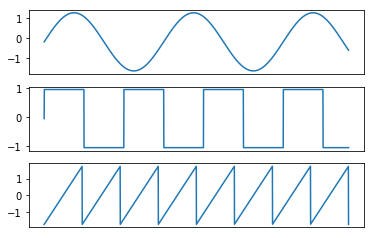

In [2]:
plot_data(S)

## Observed Signals

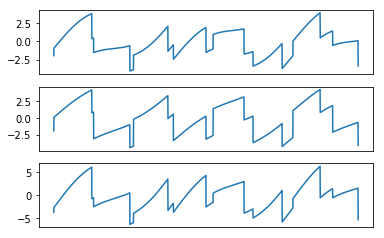

In [4]:
plot_data(X)

## FastICA

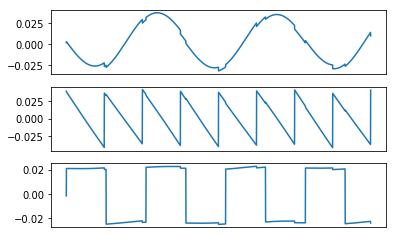

In [5]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
plot_data(S_)

## PCA

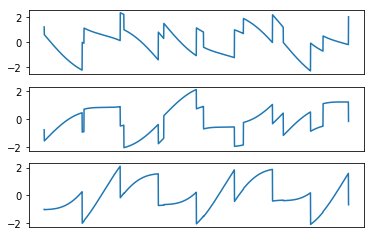

In [7]:
pca = PCA()
S_pca = pca.fit_transform(X)
S_pca /= S_pca.std(axis=0)
plot_data(S_pca)

## Andrew Ng's method

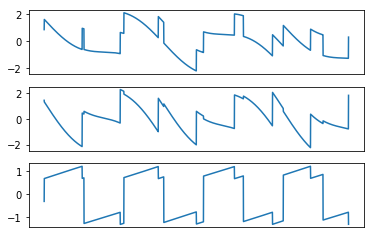

In [14]:
def sigmoid(x):
    return 1. / (1.+np.exp(-x))

num_epoch = 10000
lr = 0.000003
w_sig = np.eye(3)
for i in range(num_epoch):
    t = 1.-2.*sigmoid(np.dot(X, w_sig))
    grad = np.dot(t.T,X) + np.linalg.inv(w_sig.T)
    w_sig = w_sig + lr * grad

S_sig_grad = np.dot(X,w_sig)
S_sig_grad /= S_sig_grad.std(axis=0)
plot_data(S_sig_grad)

## Shireen's method

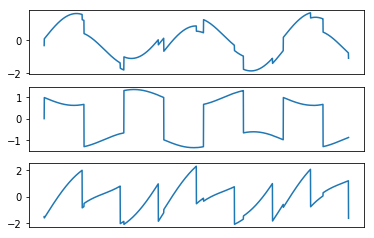

In [10]:
num_epoch = 10000
lr = 0.00003
w_tanh_grad = np.eye(3)
for curr_iter in range(num_epoch):
    u = np.dot(X, w_tanh_grad)
    U = np.tanh(u)
    g = np.linalg.inv(w_tanh_grad.T) - (2/len(X))*np.dot(X.T,U)
    w_tanh_grad = w_tanh_grad + lr * g
S_tanh_grad = np.dot(X, w_tanh_grad)
S_tanh_grad /= S_tanh_grad.std(axis=0)
plot_data(S_tanh_grad)